# Assignment 4: Happiness Index

---
## Introduction

This dataset gives the happiness rank and happiness score of 155 countries around the world based on six factors including GDP, social support, life expectancy, freedom, generosity and trust in government. The higher value of each of these  factors means the level of happiness is higher. We can define the meaning of these factors as the extent to which these factors lead to happiness. Datasets can be found here: https://www.kaggle.com/datasets/unsdsn/world-happiness.

### Research Question: Which factors when changed can lead to more significant increase in general happiness?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load datasets
index_2018 = pd.read_csv('2018.csv')
index_2019 = pd.read_csv('2019.csv')

In [4]:
index_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [5]:
index_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Let's check out for null and duplicate values.

In [6]:
print("Null values in 2018 data:", index_2018.isnull().any(axis=1).sum())
print("Duplicate values in 2018 data:", index_2018.duplicated().sum())
print("Null values in 2019 data:", index_2019.isnull().any(axis=1).sum())
print("Duplicate values in 2019 data:",  index_2019.duplicated().sum())

Null values in 2018 data: 1
Duplicate values in 2018 data: 0
Null values in 2019 data: 0
Duplicate values in 2019 data: 0


Let's check out the null values in 2018 dataset.

In [7]:
null_2018 = index_2018[index_2018.isnull().any(axis=1)]
null_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


We shall remove UAE from our 2019 data analysis since we cannot do a fair comparison of how all variables changed from 2018-2019.

In [8]:
index_2018 = index_2018[index_2018['Country or region'] != 'United Arab Emirates']
index_2019 = index_2019[index_2019['Country or region'] != 'United Arab Emirates']

#### Creating merged dataframe based on countries found in both dataframes

In [9]:
merged_df = pd.merge(index_2018, index_2019, on='Country or region', how='inner', suffixes=('_2018', '_2019'))
merged_df

,Overall rank_2018,Country or region,Score_2018,GDP per capita_2018,Social support_2018,Healthy life expectancy_2018,Freedom to make life choices_2018,Generosity_2018,Perceptions of corruption_2018,Overall rank_2019,Score_2019,GDP per capita_2019,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077
147,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
148,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091
149,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Now, we check the data types we will be working with:

In [10]:
merged_df.dtypes

Overall rank_2018                      int64
Country or region                     object
Score_2018                           float64
GDP per capita_2018                  float64
Social support_2018                  float64
Healthy life expectancy_2018         float64
Freedom to make life choices_2018    float64
Generosity_2018                      float64
Perceptions of corruption_2018       float64
Overall rank_2019                      int64
Score_2019                           float64
GDP per capita_2019                  float64
Social support_2019                  float64
Healthy life expectancy_2019         float64
Freedom to make life choices_2019    float64
Generosity_2019                      float64
Perceptions of corruption_2019       float64
dtype: object

### Feature Engineering to Answer Qn

Let's create another dataframe that consists of all the changes in scores for the indicators as well as the final happiness score. The values in these columns can be negative/positive.  Since we only need to compare the change in happiness score, overall ranks is unnecessary. So we can drop the `Overall rank_2018` and `Overall rank_2019` columns.

In [11]:
changes_df = merged_df.drop(columns = ['Overall rank_2018', 'Overall rank_2019'])


# Calculate the changes in scores for the indicators
values_2018 = [col for col in changes_df.columns if col.endswith('2018')]
values_2019 = [col for col in changes_df.columns if col.endswith('2019')]
changes = ['score_change', 'GDP_change', 'social_support_change', 'life_expectancy_change', 'freedom_change', 'generosity_change', 'corruption_perception_change']

for i, value in enumerate(values_2018):
    changes_df[changes[i]] = changes_df[values_2019[i]] - changes_df[value]

# Drop the unnecessary columns
changes_df = changes_df[['Country or region'] + changes].rename(columns={'Country or region': 'country'})
changes_df

,country,score_change,GDP_change,social_support_change,life_expectancy_change,freedom_change,generosity_change,corruption_perception_change
0,Finland,0.137,0.035,-0.005,0.112,-0.085,-0.049,0.000
1,Norway,-0.040,0.032,0.000,0.167,-0.083,-0.015,0.001
2,Denmark,0.045,0.032,-0.017,0.128,-0.091,-0.032,0.002
3,Iceland,-0.001,0.037,-0.020,0.112,-0.086,0.001,-0.020
4,Switzerland,-0.007,0.032,-0.023,0.125,-0.088,0.007,-0.014
...,...,...,...,...,...,...,...,...
146,Yemen,0.025,-0.155,0.090,0.120,-0.101,0.025,0.013
147,Tanzania,-0.072,0.021,-0.106,0.118,-0.064,0.006,0.050
148,South Sudan,-0.401,-0.031,-0.033,0.118,-0.102,-0.022,-0.015
149,Central African Republic,0.000,0.002,0.000,0.095,-0.080,0.017,-0.003


Get a dataframe that compiles all the countries which have a **positive happiness score change**.

In [12]:
change_incr_df = changes_df[changes_df['score_change'] > 0]
change_incr_df = change_incr_df.rename(columns={'score_change': 'score_increase'})
change_incr_df

,country,score_increase,GDP_change,social_support_change,life_expectancy_change,freedom_change,generosity_change,corruption_perception_change
0,Finland,0.137,0.035,-0.005,0.112,-0.085,-0.049,0.000
2,Denmark,0.045,0.032,-0.017,0.128,-0.091,-0.032,0.002
5,Netherlands,0.047,0.035,0.034,0.121,-0.081,-0.011,0.003
8,Sweden,0.029,0.032,-0.014,0.096,-0.085,-0.018,-0.010
11,Austria,0.107,0.035,-0.029,0.125,-0.085,0.002,0.002
...,...,...,...,...,...,...,...,...
137,Madagascar,0.159,0.012,0.008,0.153,-0.073,0.014,-0.008
142,Haiti,0.015,0.008,-0.026,0.160,0.001,0.027,0.006
143,Liberia,0.480,-0.003,0.064,0.176,-0.049,0.027,0.003
146,Yemen,0.025,-0.155,0.090,0.120,-0.101,0.025,0.013


There are 87 countries with an increase in happiness score.

### Correlation Analysis
Let's visualise the correlation between changes in indicators and the score increase through a correlation matrix.

C:\Users\David\AppData\Local\Temp\ipykernel_7964\735252538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = change_incr_df.corr()


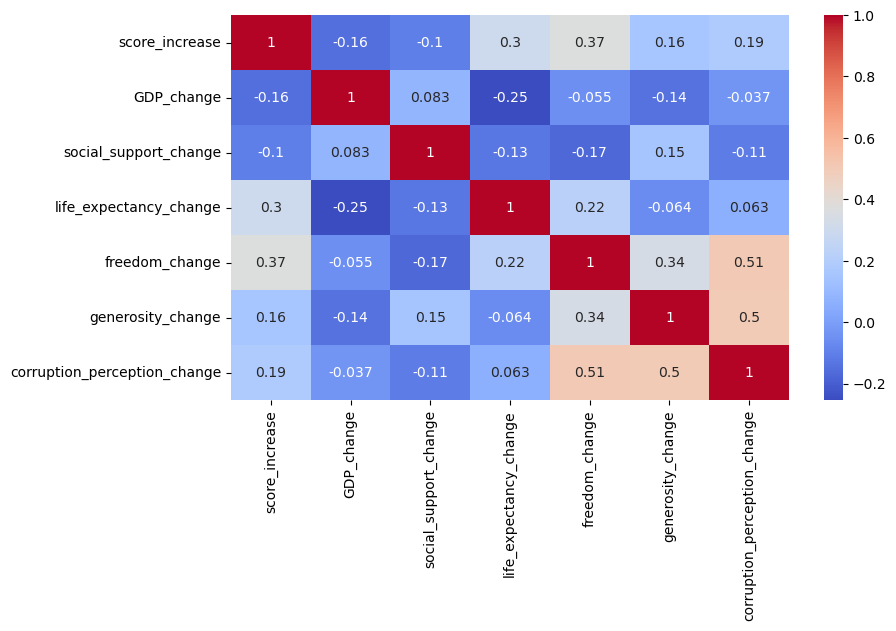

In [13]:
corrMatrix = change_incr_df.corr()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm");

Correlation Matrix observations:
- **Score increase is mostly influenced by changes to the level of freedom and healthy life expectancy.**
- **Score increase is negatively correlated with changes to the GDP pc and social support.**

---
To verify this correlation, let's take the **top 20 countries with the highest happiness score increase** and plot a parallel coordinates plot.

In [14]:
top20_scores = change_incr_df.nlargest(20, 'score_increase').copy()
top20_scores

,country,score_increase,GDP_change,social_support_change,life_expectancy_change,freedom_change,generosity_change,corruption_perception_change
150,Burundi,0.870,-0.045,-0.180,0.235,0.155,0.027,0.104
132,Benin,0.742,0.015,0.065,0.157,-0.091,0.012,0.015
135,Guinea,0.570,0.036,0.037,0.164,-0.062,0.022,-0.008
143,Liberia,0.480,-0.003,0.064,0.176,-0.049,0.027,0.003
130,Niger,0.462,0.007,-0.093,0.145,-0.072,0.013,0.003
63,Kosovo,0.438,0.027,0.002,0.180,0.041,-0.012,-0.017
69,Honduras,0.356,0.022,0.031,0.206,0.048,0.049,0.004
104,Ghana,0.339,0.019,-0.028,0.149,-0.118,0.033,0.011
18,Israel,0.325,-0.025,-0.104,0.146,-0.162,-0.093,-0.190
58,Cyprus,0.284,0.034,0.032,0.133,-0.017,-0.012,0.006


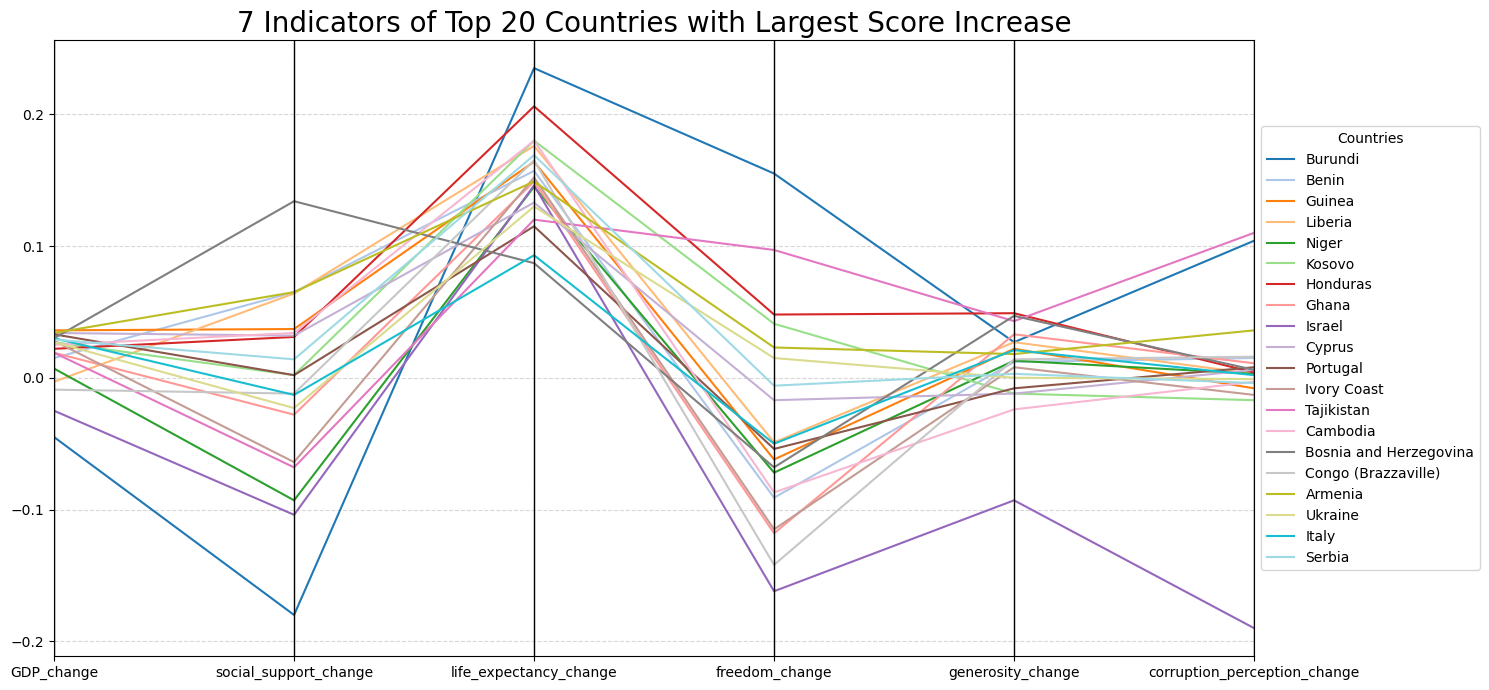

In [15]:
# remove the Score increase column since we already have top 20 countries in order
pcplot = top20_scores.drop(columns =['score_increase'], axis=1)

# Increase the figure size and adjust the layout
fig, ax = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(left=0.1, right=0.85)


pd.plotting.parallel_coordinates(pcplot, 'country', colormap='tab20', ax=ax)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Countries')
plt.title('7 Indicators of Top 20 Countries with Largest Score Increase', fontsize=20);

## Conclusion of findings from the parallel coordinate plot
Firstly, Benin, which exhibits the largest score increase, **stands out among the other countries in terms of the changes in healthy life expectancy and freedom indicators**. The line representing Benin (darkest blue line) consistently shows the highest values for these indicators, indicating that improvements in healthy life expectancy and freedom have a more significant influence on the increase in general happiness. 

Furthermore, **the trajectory of the line representing Benin converges towards the the trajectories of other countries' lines (most different from other countries) after passing through the indicator of freedom**, implying that freedom to make own life choices is the most significant in increasing general happiness.

*These findings (including the correlation matrix) suggest that prioritizing efforts to enhance health outcomes and foster individual freedom can have a substantial positive impact on overall happiness levels.*

## Appendix

In this section, we will implement multiple machine learning algorithms to predict happiness score. Im going to use the data from 2018 as my train, validation and test data, and the data from 2019 as a simulation of the data in production.


In [16]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate

X = index_2018.drop(['Score', 'Overall rank', 'Country or region'],axis=1)
y = index_2018.Score
X_2019 = index_2019.drop(['Score', 'Overall rank', 'Country or region'],axis=1)
y_2019 = index_2019.Score

The first model I'm going to try is a OLS, so before start, i will check for the assumptions.

In [17]:
#https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression
#https://www.kaggle.com/code/bhujithmadav/linear-regression-assumptions
#https://www.kaggle.com/code/raghurayirath/complete-guide-assumptions-of-linear-regression

#https://www.kaggle.com/code/ericsims/small-sample-regression-k-fold-cross-validation

In [18]:
#merge X and Y dataframes
index_2018_train = pd.merge(X, y, left_index=True, right_index=True, how='inner')

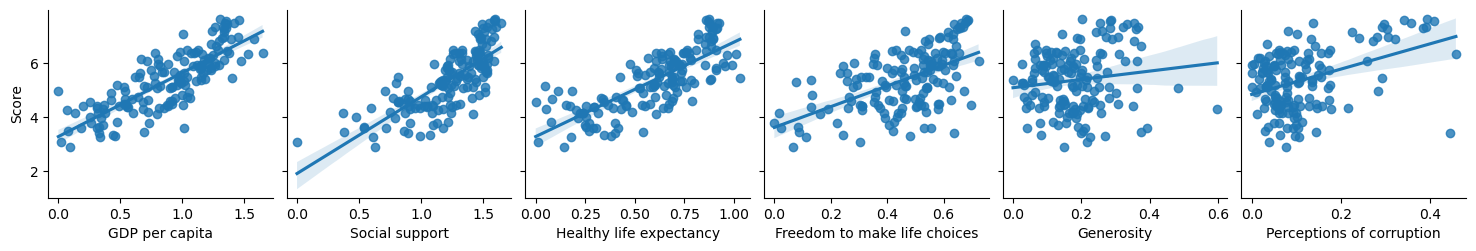

In [21]:
#check linearity
sns.pairplot(index_2018_train, 
             x_vars = index_2018_train.drop(columns = ['Score']).columns,
             y_vars='Score', kind='reg');

By looking at the plots we can see that score is somehow linear with the independents variables GDP, social support, life expectancy and freedom. But there is no a clear linear relationship with generosity or corruption.

In [22]:
#Use variance inflation factor to identify any significant multi-collinearity
X_cor = X.corr()
VIF = pd.DataFrame(np.linalg.inv(X_cor.values), index = X_cor.index, columns=X_cor.columns)
VIF

#https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
GDP per capita,4.822898,-1.269360,-3.206693,-0.025398,0.282990,-0.342960
Social support,-1.269360,2.302162,-0.367129,-0.439847,-0.000714,0.222472
Healthy life expectancy,-3.206693,-0.367129,4.092494,-0.068590,-0.047872,-0.137436
Freedom to make life choices,-0.025398,-0.439847,-0.068590,1.513535,-0.271433,-0.475793
Generosity,0.282990,-0.000714,-0.047872,-0.271433,1.228870,-0.394809
Perceptions of corruption,-0.342960,0.222472,-0.137436,-0.475793,-0.394809,1.467442


The VIF Value (which it is the value on the diagonal of the matrix above) is used to detect multicollinearity. VIF values greater than 5 or 10 for any independent variable suggest significant multicollinearity. To test the other assumptions we need to fit the model.

In [23]:
#model fit
linreg = LinearRegression().fit(X, y)

In [24]:
#calculo de los residuos del modelo
y_pred = linreg.predict(X)
residuals = y.values-y_pred

The mean of the residuals is 0.00


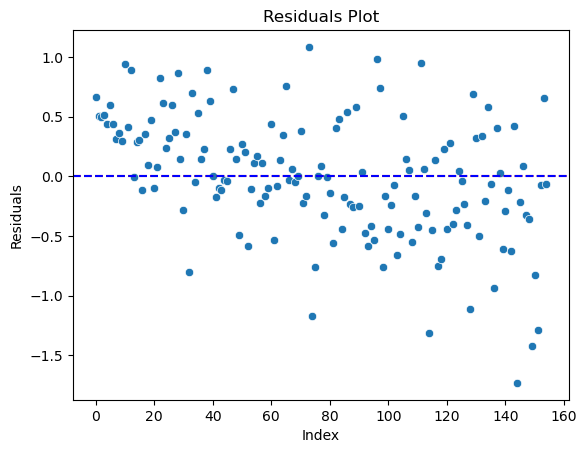

In [25]:
#Distribucion y media de los residuos.
print("The mean of the residuals is %.2f" % np.mean(residuals))
sns.scatterplot(residuals)
plt.axhline(y = 0, ls="--", color='red')
plt.axhline(y = np.mean(residuals), ls="--", color='blue')
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals');

In [26]:
#Durbin Watson Test
from statsmodels.stats.stattools import durbin_watson
print('Durbin Watson Test Statistic ',durbin_watson(residuals))

Durbin Watson Test Statistic  1.6594481102971503


As we can see Residuals are not related to each other. The Durbin-Watson test is used to checks for autocorrelation in the residuals, with a value around 2 indicating no significant autocorrelation. Now lets check for the normality of the residuals.

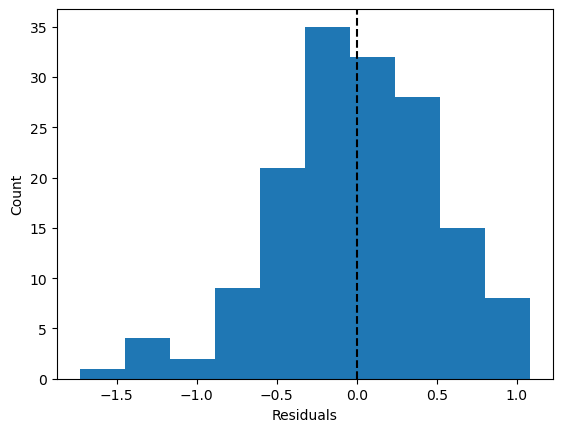

In [27]:
# Histogram Plot
plt.hist(residuals);
plt.axvline(residuals.mean(),color='k',linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Count');

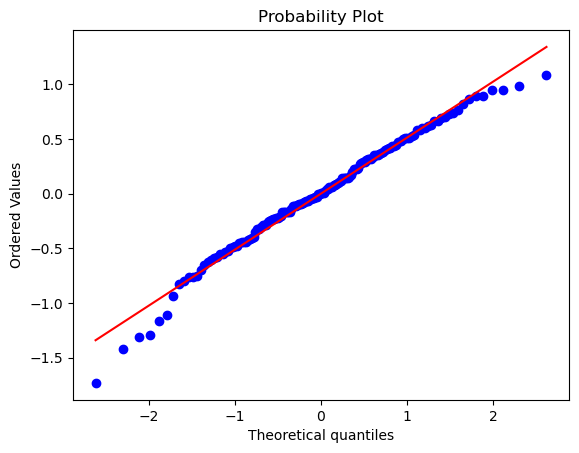

In [28]:
# Quantile-Quantile Plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt);

In [29]:
# shapiro test
from scipy.stats import shapiro
shapiro(residuals)

ShapiroResult(statistic=0.9836268424987793, pvalue=0.06330778449773788)

We can observe that the residuals follow a normal distribution. Also the Shapiro-Wilk test above returned a p-value of 0.063, so it cant  reject the null hypothesis that the population is normally distributed. Finally we look for Homoscedasticity.

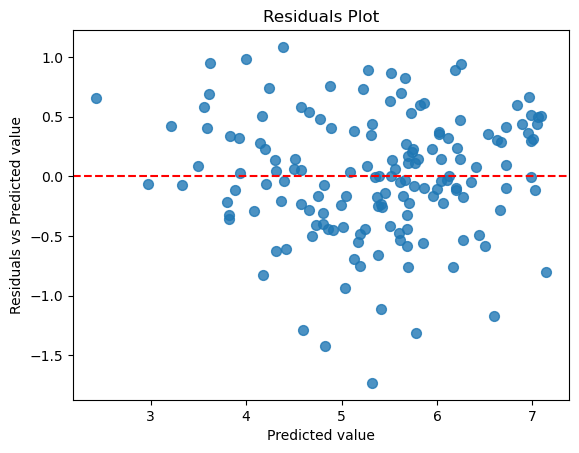

In [30]:
# residual vs predicted
plt.scatter(y_pred, residuals, marker= 'o', s=50, alpha=0.8)
plt.axhline(y = 0, ls="--", color='red');
plt.title('Residuals Plot')
plt.xlabel('Predicted value')
plt.ylabel('Residuals vs Predicted value');

In [31]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.521319722591494), ('p-value', 0.03897552700410543)]

We can see that the residuals have constant variability. The Goldfeld-Quandt test is a statistical test used to check for heteroscedasticity in a regression model and it is commonly used when the data can be ordered or categorized in some way, A p-value greater than 0.05 means that Error terms are homoscedastic. 

Now that we have validated our model, we are going to improve it(We can improve our regression model with differents aproaches: Subset Selection, Shrinkage and Dimension Reduction. In this time we are going to use Lasso regression), and also try some other models.

In [19]:
#https://www.kaggle.com/code/jhskaggle/model-selection-and-hyperparamete
#Create kfolds and shuffle them to randomize data
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

#create models and use cross validation
lr = LinearRegression()
cv_lr = cross_validate(lr, X, y, cv = kfold, scoring='r2')
print('CV R-squared linear regression train set:',np.mean(cv_lr['test_score']))

CV R-squared linear regression train set: 0.7216296334525315


In [60]:
#define a fuction for nested cross-validation
#https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_nested.html
#https://ploomber.io/blog/nested-cv/
#https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/

def nested_cv(X, y, model, grid_values, score):
    """
    Perform nested cross-validation to evaluate a machine learning model.

    Parameters:
        X (pandas DataFrame): The feature matrix.
        y (pandas Series): The target variable.
        model: The machine learning model to be evaluated.
        grid_values (dict): A dictionary containing hyperparameter values to be searched using GridSearchCV.
        score (str or callable): The scoring metric used for model evaluation.

    Returns:
        None

    Prints:
        The R^2 score for each outer fold and the best hyperparameters found by GridSearchCV.
        The mean and standard deviation of the R^2 scores across all outer folds.
    """
    # configure the cross-validation procedure
    cv_outer = KFold(n_splits=10, shuffle=True, random_state=0)
    # enumerate splits
    outer_results = list()
    for train_ix, test_ix in cv_outer.split(X):
        # split data
        X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        # configure the cross-validation procedure
        cv_inner = KFold(n_splits=3, shuffle=True, random_state=0)
        # define search
        search = GridSearchCV(model, grid_values, scoring=score, cv=cv_inner, refit=True)
        # execute search
        result = search.fit(X_train, y_train)
        # get the best performing model fit on the whole training set
        best_model = result.best_estimator_
        # evaluate model on the hold out dataset
        yhat = best_model.predict(X_test)
        # evaluate the model in test data
        r2 = result.score(X_test, y_test)
        # store the result
        outer_results.append(r2)
        # report progress
        print('R^2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
    # summarize the estimated performance of the model
    print('R^2: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

In [62]:
# Lasso Reggression
model = Lasso()
grid_values = {'alpha': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}
score='r2'
nested_cv(X, y, model, grid_values, score)

R^2=0.800, est=0.737, cfg={'alpha': 0.01}
R^2=0.878, est=0.709, cfg={'alpha': 0.01}
R^2=0.572, est=0.770, cfg={'alpha': 0.001}
R^2=0.270, est=0.806, cfg={'alpha': 0.001}
R^2=0.740, est=0.740, cfg={'alpha': 0.01}
R^2=0.905, est=0.731, cfg={'alpha': 0.001}
R^2=0.891, est=0.757, cfg={'alpha': 0.001}
R^2=0.610, est=0.777, cfg={'alpha': 0.001}
R^2=0.790, est=0.745, cfg={'alpha': 0.01}
R^2=0.770, est=0.741, cfg={'alpha': 0.01}
R^2: 0.722 (0.184)


In [34]:
# Random Forest
model = RandomForestRegressor(random_state=0)
grid_values = {
    'n_estimators': [50, 100, 150],            # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],            # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required to be at a leaf node
    }
score='r2'
nested_cv(X, y, model, grid_values, score)

R^2=0.860, est=0.742, cfg={'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
R^2=0.844, est=0.771, cfg={'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
R^2=0.610, est=0.787, cfg={'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
R^2=0.508, est=0.780, cfg={'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
R^2=0.771, est=0.753, cfg={'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
R^2=0.875, est=0.744, cfg={'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
R^2=0.905, est=0.740, cfg={'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
R^2=0.669, est=0.795, cfg={'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
R^2=0.834, est=0.762, cfg={'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators':

In [62]:
# Gradient Boosting
model = GradientBoostingRegressor(random_state=0)
grid_values = {
    'n_estimators': [50, 100, 150],            # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],         # Learning rate for each boosting stage
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual trees
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required to be at a leaf node
}
score='r2'
nested_cv(X, y, model, grid_values, score)

R^2=0.831, est=0.730, cfg={'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 50}
R^2=0.776, est=0.757, cfg={'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 50}
R^2=0.248, est=0.779, cfg={'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 50}
R^2=0.476, est=0.769, cfg={'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 50}
R^2=0.741, est=0.709, cfg={'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 50}
R^2=0.888, est=0.751, cfg={'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 50}
R^2=0.919, est=0.724, cfg={'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 50}
R^2=0.663, est=0.777, cfg={'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 100}
R^2=0.820, est=0.746, cfg={'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 50}
R^2=0.725, est=0.745, cfg={

In [63]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Multi-layer Perceptron regression
model = MLPRegressor(random_state=0)
grid_values = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], # Different hidden layer architectures
    'activation': ['relu', 'tanh'],                             # Activation functions to use
    'learning_rate': ['constant', 'adaptive'],                  # Learning rate schedule
    'max_iter': [100, 200, 300]                                 # Number of iterations
}
score='r2'
nested_cv(X, y, model, grid_values, score)

# Restore warning behavior
warnings.filterwarnings("default")

R^2=0.770, est=0.752, cfg={'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200}
R^2=0.868, est=0.743, cfg={'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100}
R^2=0.625, est=0.774, cfg={'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100}
R^2=0.296, est=0.796, cfg={'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100}
R^2=0.707, est=0.754, cfg={'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100}
R^2=0.912, est=0.732, cfg={'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100}
R^2=0.898, est=0.753, cfg={'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 100}
R^2=0.569, est=0.784, cfg={'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200}


As we can observe the higher value in R2 it is 0.756 and it is on the Random Forest Regression model, So we are going to re-train this model on the entire train set and then tested in the simulated production set.

In [20]:
#train model in full data
model = RandomForestRegressor(random_state=0)
grid_values = {
    'n_estimators': [50, 100, 150],            # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],            # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required to be at a leaf node
    }
rf = GridSearchCV(model, param_grid = grid_values, cv = kfold, scoring='r2', refit = True)
rf.fit(X, y)
print('R-squared RandomForest production set:', rf.score(X_2019, y_2019))

R-squared RandomForest production set: 0.7885810566595451


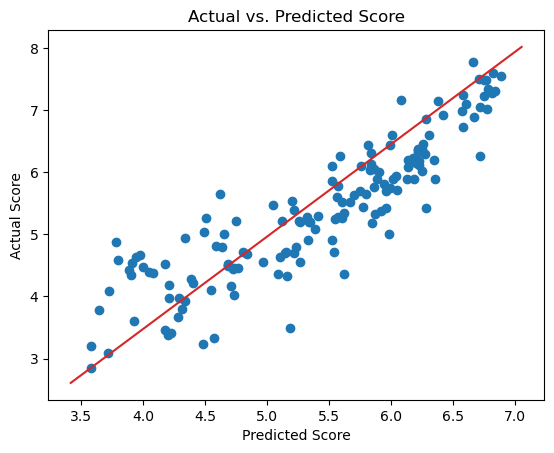

In [22]:
plt.scatter(rf.predict(X_2019), y_2019, color='#1f77b4')
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, color ="#d62728")
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')
plt.title("Actual vs. Predicted Score");